In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import GRU 
from keras.optimizers import SGD

In [198]:
ic = pd.read_csv('ICICIBANK.yahoo.csv')

In [199]:
ic['Date'] = pd.to_datetime(ic['Date'])
ic.index = ic['Date']
ic.index.name = None

In [200]:
ic.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2002-07-01,2002-07-01,25.418180,25.818180,24.818180,25.127272,18.280954,2047540.0
2002-07-02,2002-07-02,25.454544,27.636362,25.236362,26.745455,19.458239,5546354.0
2002-07-03,2002-07-03,26.727272,28.181818,26.645454,28.090908,20.437101,5745267.0
2002-07-04,2002-07-04,28.181818,28.799999,27.036364,27.390909,19.927828,3896601.0
2002-07-05,2002-07-05,27.090908,27.863636,26.945454,27.672728,20.132860,3261038.0


In [201]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5442 entries, 2002-07-01 to 2024-05-17
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5442 non-null   datetime64[ns]
 1   Open       5432 non-null   float64       
 2   High       5432 non-null   float64       
 3   Low        5432 non-null   float64       
 4   Close      5432 non-null   float64       
 5   Adj Close  5432 non-null   float64       
 6   Volume     5432 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 340.1 KB


In [202]:
ic['Date'] = pd.to_datetime(ic['Date'])
ic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5442 entries, 2002-07-01 to 2024-05-17
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5442 non-null   datetime64[ns]
 1   Open       5432 non-null   float64       
 2   High       5432 non-null   float64       
 3   Low        5432 non-null   float64       
 4   Close      5432 non-null   float64       
 5   Adj Close  5432 non-null   float64       
 6   Volume     5432 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 340.1 KB


In [203]:
ic.isnull().sum()

Date          0
Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64

In [204]:
# ic['Open'] = ic['Open'].fillna(ic['Open'].mean())
# ic['High'] = ic['High'].fillna(ic['High'].mean())
# ic['Low'] = ic['Low'].fillna(ic['Low'].mean())
# ic['Close'] = ic['Open'].fillna(ic['Open'].mean())
# ic['Adj Close'] = ic['Adj Close'].fillna(ic['Adj Close'].mean())
# ic['Volume'] = ic['Volume'].fillna(ic['Volume'].mean())


In [205]:
ic.dropna(axis=0,inplace=True)

In [206]:
ic.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [207]:
data = ic['Open'].values.reshape(-1,1)
# data2 = pd.DataFrame(data)
# data2.tail(32)

In [208]:
# data2 = data2.iloc[:-32]

In [209]:
# data2.tail(5)

In [210]:
# data2.shape

In [211]:
ic.shape

(5432, 7)

In [212]:
scal = MinMaxScaler(feature_range=(0, 1))

In [213]:
# scal = MinMaxScaler(feature_range=(0, 1))

In [214]:
open_scal = scal.fit_transform(data)

In [215]:
# open_scal2 = scal.fit_transform(data2)

In [216]:
def create_sequence(data,seq_length):
    sequence = []
    label=[]
    for i in range(len(data)- seq_length):
        sequence.append(data[i:i+seq_length])
        label.append(data[i+seq_length])
    return np.array(sequence), np.array(label)

In [217]:
sequence_length = 20
split_ratio = 0.8

In [218]:
# X,y = create_sequence(open_scal2,sequence_length)
# split = int(split_ratio *len(X))

# X_train , X_test = X[:split] , X[split:]
# y_train , y_test = y[:split] , y[split:]

In [219]:
X,y = create_sequence(open_scal,sequence_length)
split = int(split_ratio *len(X))

X_train , X_test = X[:split] , X[split:]
y_train , y_test = y[:split] , y[split:]

In [220]:
print("The shape of X_train" , X_train.shape)
print("The shape of y_train" , y_train.shape)
print("The shape of X_test" , X_test.shape)
print("The shape of y_test" , y_test.shape)

The shape of X_train (4329, 20, 1)
The shape of y_train (4329, 1)
The shape of X_test (1083, 20, 1)
The shape of y_test (1083, 1)


In [221]:
lstm = Sequential()
lstm.add(LSTM(units=100,return_sequences=True,input_shape = (X_train.shape[1],X_train.shape[2])))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=100))
lstm.add(Dropout(0.2))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ommak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [222]:
# regressorGRU = Sequential()
# # First GRU layer with Dropout regularisation
# regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
# regressorGRU.add(Dropout(0.2))
# # Second GRU layer
# regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
# regressorGRU.add(Dropout(0.2))
# # Third GRU layer
# regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
# regressorGRU.add(Dropout(0.2))
# # Fourth GRU layer
# regressorGRU.add(GRU(units=50, activation='tanh'))
# regressorGRU.add(Dropout(0.2))
# # The output layer
# regressorGRU.add(Dense(units=1))
# regressorGRU.compile(optimizer=SGD, loss='mean_squared_error')

In [223]:
history = lstm.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0026
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 2.1048e-04
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.8329e-04
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.7682e-04
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.4695e-04
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.4665e-04
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.4891e-04
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.3600e-04
Epoch 9/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.2277e-04
Epoch 10/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.2425e-04
Epoch 11/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.1436e-04
Epoch 12/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 9.4606e-05
Epoch 13/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 9.7794e-05
Epoch 14/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/

In [224]:
# regressorGRU.fit(X_train,y_train,epochs=250,batch_size=32)

In [225]:
y_pred = lstm.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


In [226]:

# actual_values_original_scale = scal.inverse_transform(y_test[-12:].reshape(-1, 1)).flatten()
# predicted_values_original_scale = scal.inverse_transform(y_pred[-12:].reshape(-1, 1)).flatten()

# last_12_dates = ic.index[-12:]

# date_strings = [str(date) for date in last_12_dates]

# plt.figure(figsize=(10,5))
# plt.plot(last_12_dates,actual_values_original_scale,color='red', label='Actual Value')
# plt.plot(last_12_dates,predicted_values_original_scale,color='navy', label='Predicted Value')
# plt.title('Prediction by LSTM')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.tight_layout() 
# plt.show()

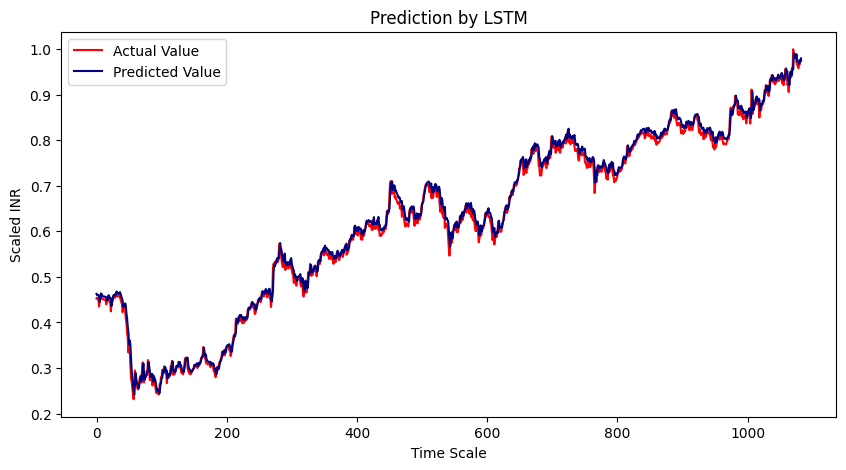

In [227]:
plt.figure(figsize=(10,5))
plt.plot(y_test,color='red', label='Actual Value')
plt.plot(y_pred,color='navy', label='Predicted Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled INR')
plt.legend()
plt.show()

In [228]:

# actual_values_original_scale = scal.inverse_transform(y_test[-12:].reshape(-1, 1)).flatten()
# predicted_values_original_scale = scal.inverse_transform(y_pred[-12:].reshape(-1, 1)).flatten()

# last_12_dates = ic.index[-12:]

# date_strings = [str(date) for date in last_12_dates]

# plt.figure(figsize=(10,5))
# plt.plot(last_12_dates,actual_values_original_scale,color='red', label='Actual Value')
# plt.plot(last_12_dates,predicted_values_original_scale,color='navy', label='Predicted Value')
# plt.title('Prediction by LSTM')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.tight_layout() 
# plt.show()

In [229]:
test_loss = lstm.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7305e-04
Test Loss: 0.00017358880722895265


In [230]:
test_loss = lstm.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.7305e-04
Test Loss: 0.00017358880722895265


In [231]:
sequence = open_scal
sequence = sequence.reshape((1, sequence.shape[0], 1))
predicted_price = lstm.predict(sequence)
predicted_price = scal.inverse_transform(predicted_price)
print("Predicted Price for Next day:", predicted_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Price for Next day: [[1134.9054]]


In [232]:
# sequence = open_scal2
# sequence = sequence.reshape((1, sequence.shape[0], 1))
# predicted_price = lstm.predict(sequence)
# predicted_price = scal.inverse_transform(predicted_price)
# print("Predicted Price for Next day:", predicted_price)

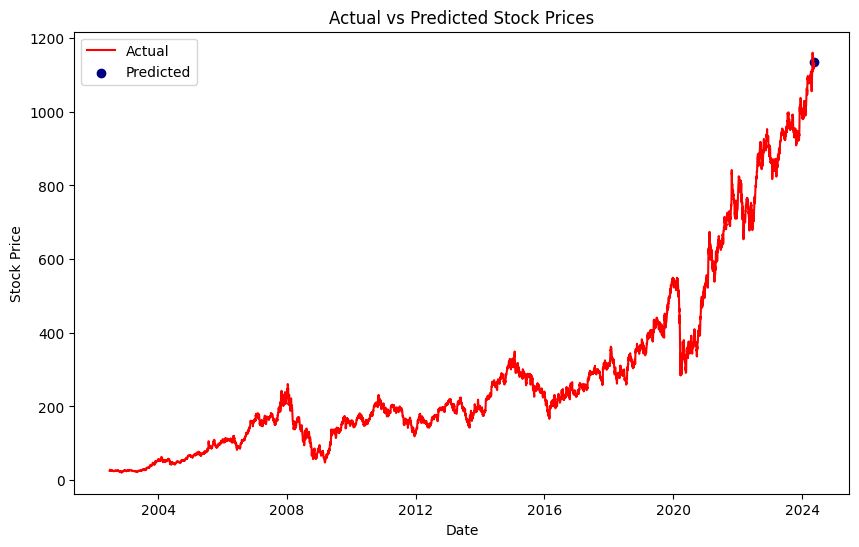

In [233]:
#actual stock prices
plt.figure(figsize=(10, 6))
plt.plot(ic.index, ic['Close'], color='red', label='Actual')

#predicted stock price
plt.scatter(ic.index[-1], predicted_price, color='navy', label='Predicted')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

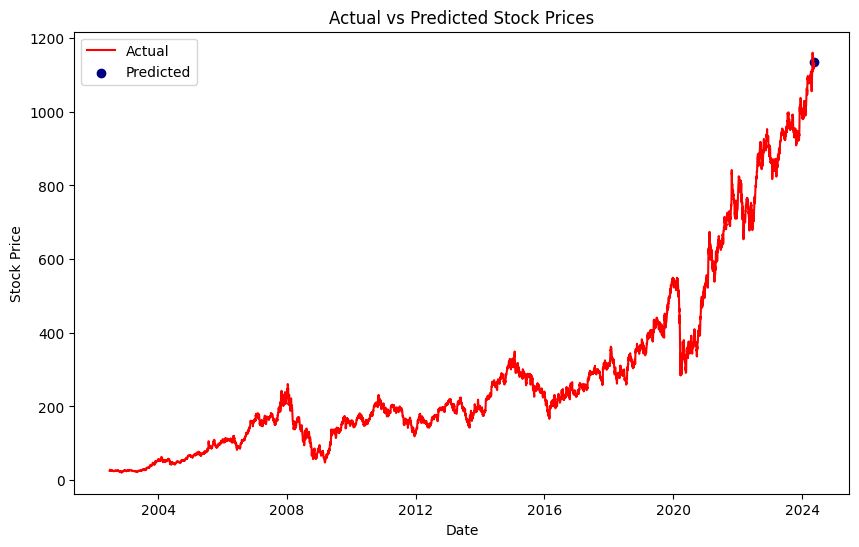

In [234]:
plt.figure(figsize=(10, 6))
plt.plot(ic.index, ic['Close'], color='red', label='Actual')

#predicted stock price
plt.scatter(ic.index[-1], predicted_price, color='navy', label='Predicted')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [235]:
# lstm.save('lstm.h5')

In [236]:
# from keras.models import load_model
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

# # Load models
# lstm_22_close = load_model('lstm.h5')

# ici = pd.read_csv('ICICIBANK.yahoo22_5.csv')
# ici.tail()

# ici.dropna(axis=0,inplace=True)

# data22 = ici['Open']

# recent_prices_array = np.array(data22).reshape(-1, 1)


# scaler = MinMaxScaler()
# scaler.fit(recent_prices_array)

# recent_prices_normalized = scaler.transform(recent_prices_array)


# recent_prices_reshaped = recent_prices_normalized.reshape(-1, 1)

# def create_sequence(data,seq_length):
#     sequence = []
#     label=[]
#     for i in range(len(data)- seq_length):
#         sequence.append(data[i:i+seq_length])
#         label.append(data[i+seq_length])
#     return np.array(sequence), np.array(label)

# sequence_length = 20
# split_ratio = 0.8

# X,y = create_sequence(recent_prices_reshaped,sequence_length)
# split = int(split_ratio *len(X))

# X_train , X_test = X[:split] , X[split:]
# y_train , y_test = y[:split] , y[split:]

# sequence = recent_prices_normalized
# sequence = sequence.reshape((1, sequence.shape[0], 1))
# predicted_price = lstm.predict(sequence)
# predicted_price = scal.inverse_transform(predicted_price)
# print("Predicted Price for Next day:", predicted_price)

In [237]:
from keras.models import load_model
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load models
lstm_22_close = load_model('lstm.h5')

ici = pd.read_csv('ICICIBANK.yahoo22_5.csv')
ici.tail()

ici.dropna(axis=0,inplace=True)

data22 = ici['Open']

recent_prices_array = np.array(data22).reshape(-1, 1)


scaler = MinMaxScaler()
scaler.fit(recent_prices_array)

recent_prices_normalized = scaler.transform(recent_prices_array)


recent_prices_reshaped = recent_prices_normalized.reshape(-1, 1)

def create_sequence(data,seq_length):
    sequence = []
    label=[]
    for i in range(len(data)- seq_length):
        sequence.append(data[i:i+seq_length])
        label.append(data[i+seq_length])
    return np.array(sequence), np.array(label)

sequence_length = 20
split_ratio = 0.8

X,y = create_sequence(recent_prices_reshaped,sequence_length)
split = int(split_ratio *len(X))

X_train , X_test = X[:split] , X[split:]
y_train , y_test = y[:split] , y[split:]

sequence = recent_prices_normalized
sequence = sequence.reshape((1, sequence.shape[0], 1))
predicted_price = lstm_22_close.predict(sequence)
predicted_price = scal.inverse_transform(predicted_price)
print("Predicted Price for Next day:", predicted_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Price for Next day: [[1124.6642]]


In [238]:
icici = pd.read_csv('ICICIBANK.23.csv')
icici.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5439,2024-05-15,1122.099976,1127.800049,1113.500000,1124.349976,1124.349976,10743423.0
5440,2024-05-16,1133.000000,1136.550049,1112.800049,1131.050049,1131.050049,14265565.0
5441,2024-05-17,1131.050049,1144.000000,1120.599976,1130.500000,1130.500000,8641784.0
5442,2024-05-21,1122.199951,1133.800049,1116.250000,1120.949951,1120.949951,10452900.0
5443,2024-05-22,1125.000000,1125.900024,1098.099976,1111.099976,1111.099976,17525523.0


In [239]:
from keras.models import load_model
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load models
lstm_22_close = load_model('lstm.h5')

ici = pd.read_csv('ICICIBANK.23.csv')
ici.tail()

ici.dropna(axis=0,inplace=True)

data22 = ici['Open']

recent_prices_array = np.array(data22).reshape(-1, 1)


scaler = MinMaxScaler()
scaler.fit(recent_prices_array)

recent_prices_normalized = scaler.transform(recent_prices_array)

recent_prices_reshaped = recent_prices_normalized.reshape(-1, 1)

def create_sequence(data,seq_length):
    sequence = []
    label=[]
    for i in range(len(data)- seq_length):
        sequence.append(data[i:i+seq_length])
        label.append(data[i+seq_length])
    return np.array(sequence), np.array(label)

sequence_length = 20
split_ratio = 0.8

X,y = create_sequence(recent_prices_reshaped,sequence_length)
split = int(split_ratio *len(X))

X_train , X_test = X[:split] , X[split:]
y_train , y_test = y[:split] , y[split:]

sequence = recent_prices_normalized
sequence = sequence.reshape((1, sequence.shape[0], 1))
predicted_price = lstm_22_close.predict(sequence)
predicted_price = scal.inverse_transform(predicted_price)
print("Predicted Price for Next day:", predicted_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Price for Next day: [[1123.2474]]


In [240]:
from keras.models import load_model
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load models
lstm_22_close = load_model('lstm.h5')

ici = pd.read_csv('ICICIBANK.23.csv')
ici.tail()

ici.dropna(axis=0,inplace=True)

data22 = ici['Open']

recent_prices_array = np.array(data22).reshape(-1, 1)


scaler = MinMaxScaler()
scaler.fit(recent_prices_array)

recent_prices_normalized = scaler.transform(recent_prices_array)


recent_prices_reshaped = recent_prices_normalized.reshape(-1, 1)

def create_sequence(data,seq_length):
    sequence = []
    label=[]
    for i in range(len(data)- seq_length):
        sequence.append(data[i:i+seq_length])
        label.append(data[i+seq_length])
    return np.array(sequence), np.array(label)

sequence_length = 20
split_ratio = 0.8

X,y = create_sequence(recent_prices_reshaped,sequence_length)
split = int(split_ratio *len(X))

X_train , X_test = X[:split] , X[split:]
y_train , y_test = y[:split] , y[split:]

sequence = recent_prices_normalized
sequence = sequence.reshape((1, sequence.shape[0], 1))
predicted_price = lstm.predict(sequence)
predicted_price = scal.inverse_transform(predicted_price)
print("Predicted Price for Next day:", predicted_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
Predicted Price for Next day: [[1130.5021]]
